# Calories Burnt Prediction using Machine Learning with Python

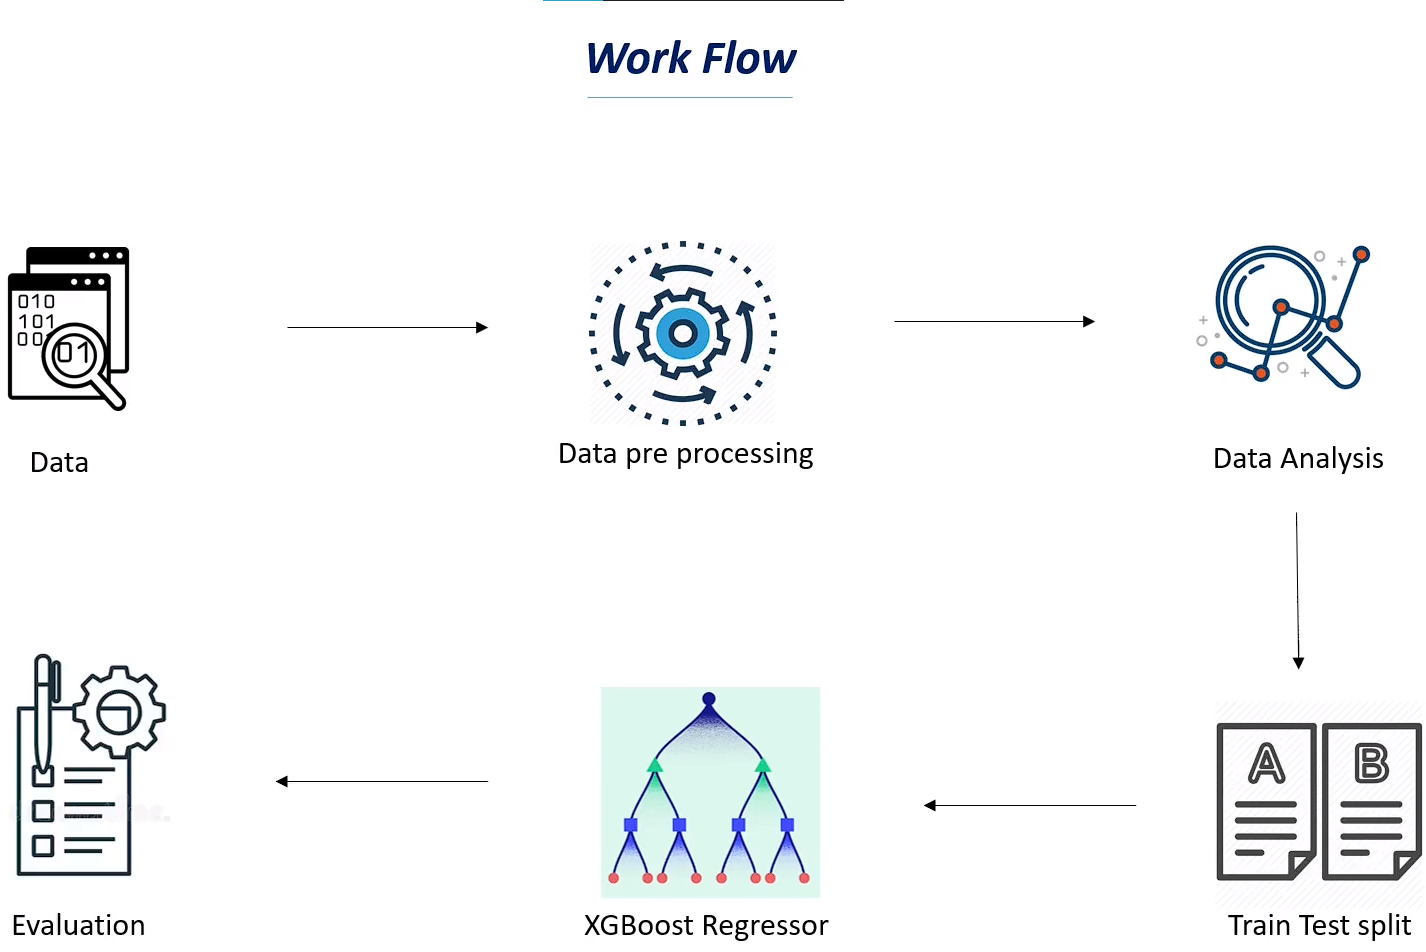

                                 - - - - - - - - X X X X X X X X - - - - - - - -

In [1]:
# Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection & Processing

In [2]:
# Loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

# Print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
# Loading the data from csv file to a Pandas DataFrame
exercise_data = pd.read_csv('exercise.csv')

# Print the first 5 rows of the dataframe
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# Combining the two Dataframes

In [4]:
# Combining
calories_data = pd.concat([exercise_data,calories['Calories']],axis=1)

calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
# Shape
calories_data.shape

(15000, 9)

In [6]:
# Getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
# Null Values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
# Checking for missing values
calories_data.isnull().sum().sum()

0

                                 - - - - - - - - X X X X X X X X - - - - - - - -

# Data Analysis

In [9]:
# Get some statistical measures about the data
calories_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


# Data Visualization

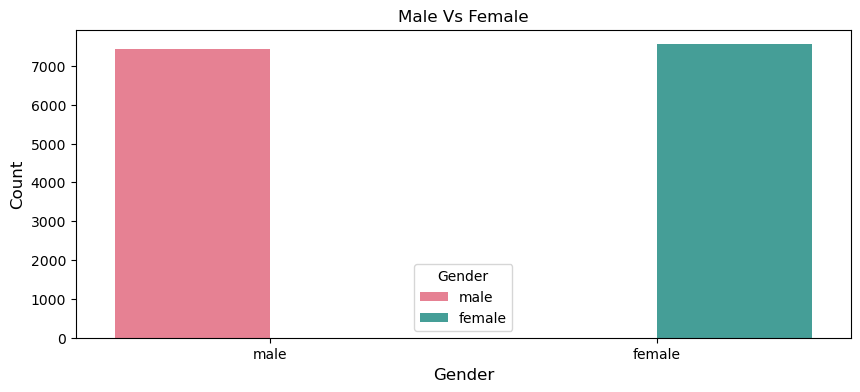

In [10]:
# Count Plot For Gender
palette = sns.color_palette("husl", 2)

plt.figure(figsize=(10,4))
sns.countplot(x='Gender', 
              data=calories_data, 
              hue="Gender", 
              palette=palette)
plt.title("Male Vs Female", size = 12)
plt.xlabel("Gender", size = 12)
plt.ylabel("Count", size = 12)
# Show the plot
plt.show()

# Skew Value

In [11]:

# Select columns of numeric data type
numeric_columns = calories_data.select_dtypes(include='number').columns

# Calculate and display skewness for each numeric column
for column in numeric_columns:
    # Calculate skewness for the current column
    skewness = calories_data[column].skew()
    
    # Display the skewness for the current column
    print(f"The Skewness of Column {column}: {skewness}")

The Skewness of Column User_ID: 0.004788390719914252
The Skewness of Column Age: 0.47338270096138746
The Skewness of Column Height: -0.006189620437893538
The Skewness of Column Weight: 0.22672530725814513
The Skewness of Column Duration: 0.0047505366680978415
The Skewness of Column Heart_Rate: -0.01070407972854895
The Skewness of Column Body_Temp: -0.9943824155974582
The Skewness of Column Calories: 0.5053713740451047


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Function to plot PDF and QQ Plot for a given column
def plot_distribution(data,column_name):
    # Set up the figure with two subplots
    plt.figure(figsize=(14, 4))

    # PDF subplot
    plt.subplot(121)
    sns.distplot(data[column_name])
    plt.title(f'{column_name} PDF')

    # QQ Plot subplot
    plt.subplot(122)
    stats.probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f'{column_name} QQ Plot')
    
    # Display all the plots
    plt.show()


### Ploting All Plot

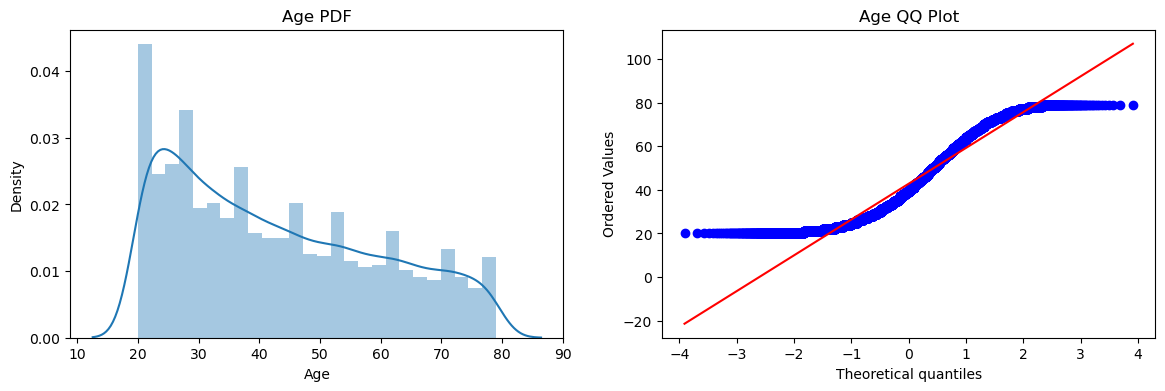

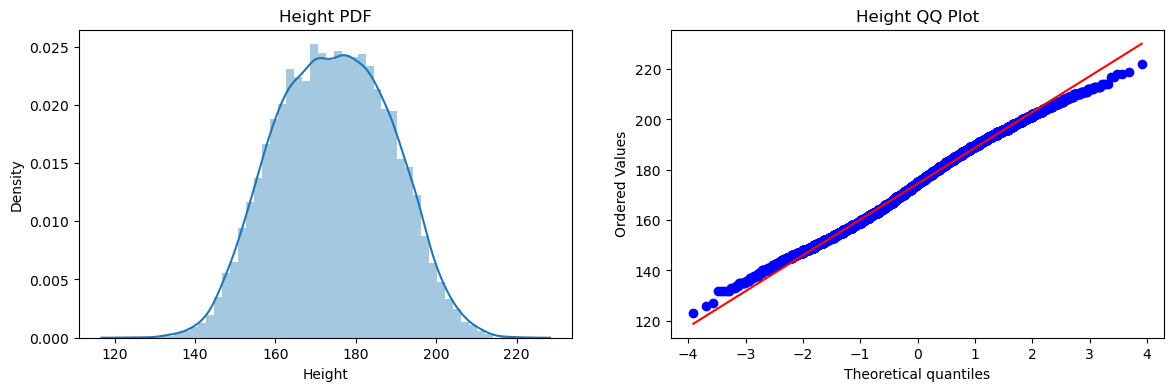

In [13]:
# For Age and Height
plot_distribution(calories_data,'Age')
plot_distribution(calories_data,'Height')
plt.show()

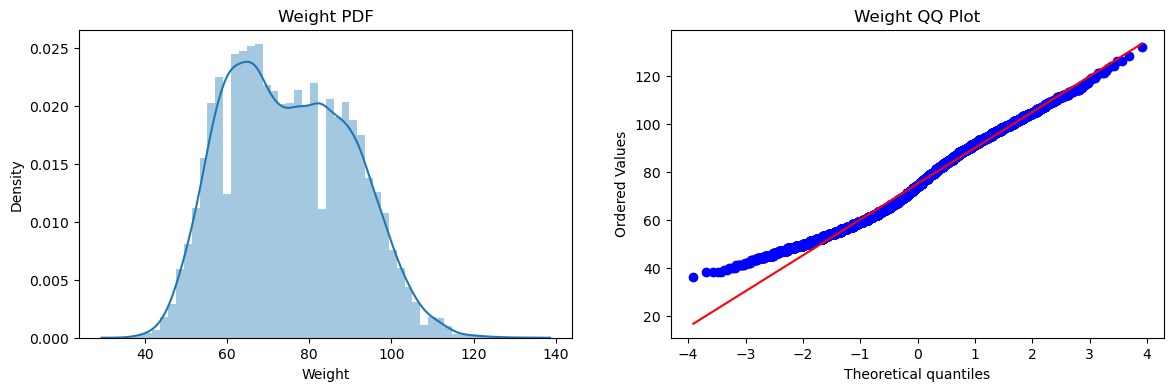

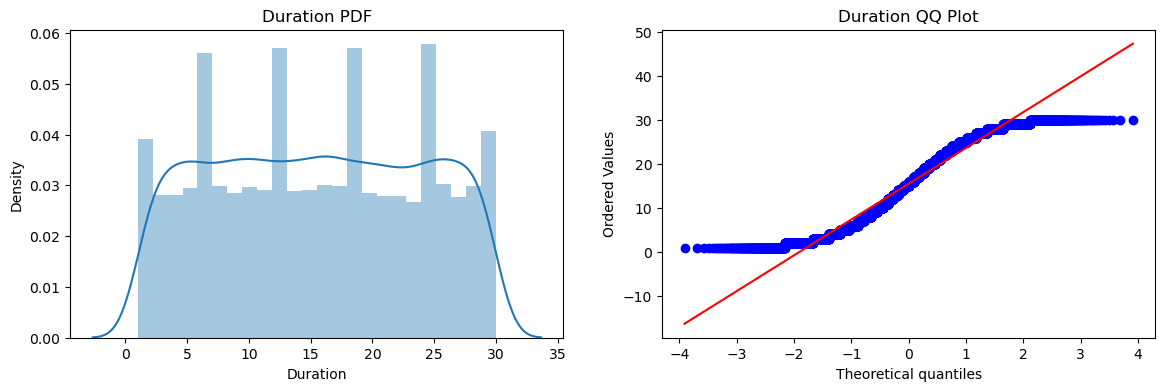

In [14]:
# For Weight and Duration
plot_distribution(calories_data,'Weight')
plot_distribution(calories_data,'Duration')
plt.show()

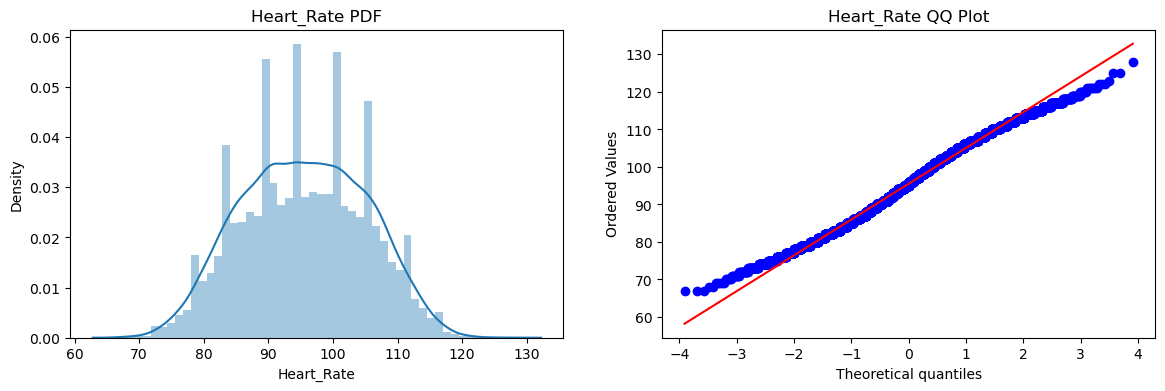

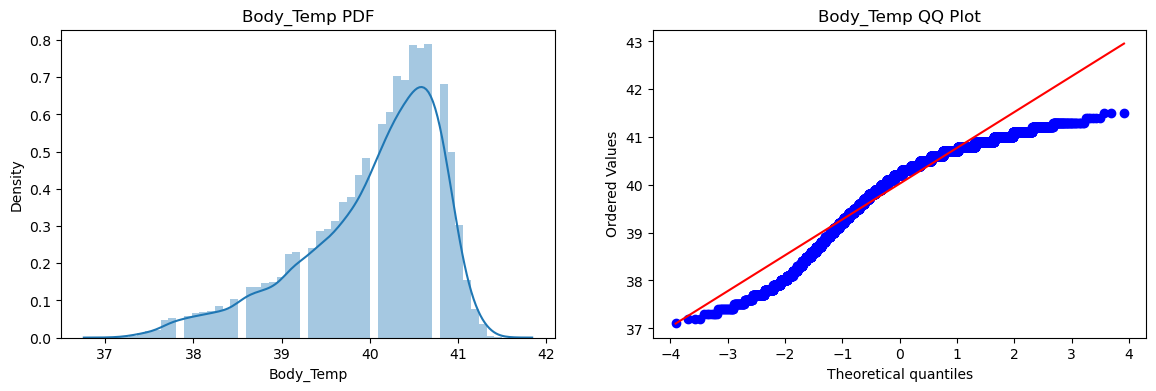

In [15]:
# for Heart_Rate and Body_Temp
plot_distribution(calories_data,'Heart_Rate')
plot_distribution(calories_data,'Body_Temp')
plt.show()

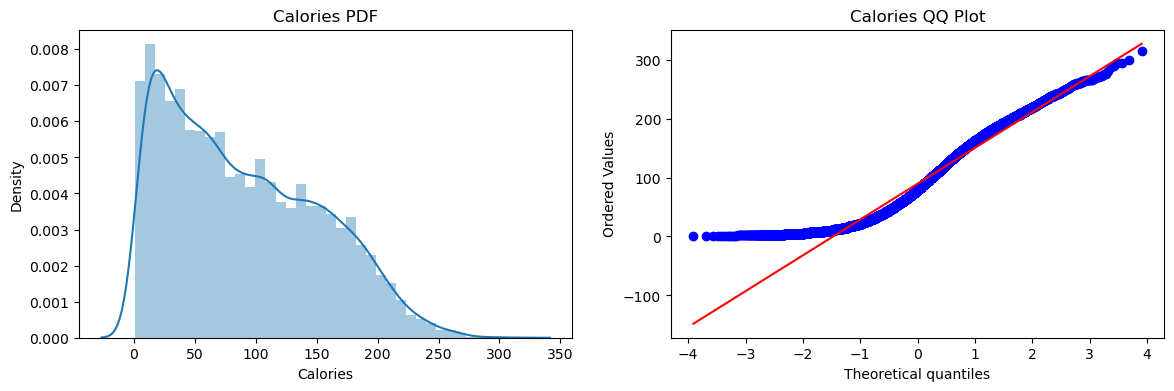

In [16]:
# For Calories
plot_distribution(calories_data,'Calories')
plt.show()

### After plotting all of the columns in PDF, we can state that the Height, Heart Rate, and Weight columns are sort of normally distributed, whereas the others are skewed to the left or right.

# Finding the Correlation in the dataset

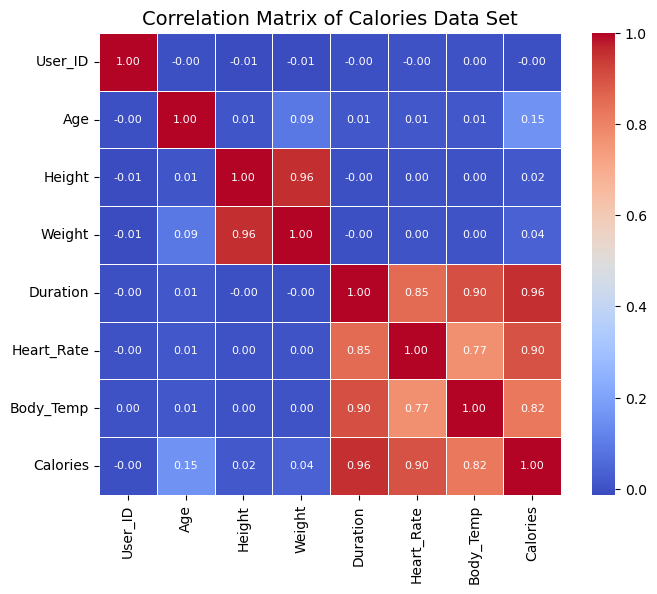

In [17]:
# Constructing a heatmap to understand the correlation

plt.figure(figsize=(8,6))
sns.heatmap(calories_data.corr(), 
            cbar=True, 
            square=True, 
            fmt='.2f', 
            annot=True, 
            annot_kws={'size':8}, 
            linewidths=0.5,
            cmap='coolwarm')
plt.title("Correlation Matrix of Calories Data Set",size=14)
plt.show()

### We Can See That The Duration, Heart Rate, and Body Temperature Are Highly Correlated with the Calories After Plotting Correlation Heat Map

# Converting the text data to numerical values

In [18]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Outlier Removal 

In [19]:
import pandas as pd

def remove_outliers(df, threshold=1.5):

    # Create a copy of the input DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Iterate over columns
    for col in df.columns:
        # Calculate IQR for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# Uses
data = remove_outliers(calories_data, threshold=1.5)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# Define X and Y

In [20]:
X = data.drop(columns=['User_ID','Calories'], axis=1)
Y = data[['Calories']]

# Splitting data into Train Test 

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
len(X_train), len(Y_train), len(X_test), len(Y_test)

(11688, 11688, 2923, 2923)

# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training With Randomized Search CV

In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the XGBRegressor model
model = XGBRegressor()

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
    'n_jobs': [int(x) for x in np.linspace(1, 16, num=16)],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [0, 1, 2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=5,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_scaled, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(X_train_scaled, Y_train)


Best Hyperparameters: {'tree_method': 'gpu_hist', 'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.2, 'n_jobs': 8, 'n_estimators': 1000, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.7, 'booster': 'gbtree'}


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=8, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Prediction on The Test Data

In [24]:
Y_test['Pred'] = best_model.predict(X_test_scaled)

In [25]:
Y_test

,Calories,Pred
2233,93.0,92.871620
654,48.0,48.421806
9530,199.0,198.589813
2601,143.0,141.895798
12666,52.0,52.215118
...,...,...
4226,64.0,63.199585
5242,202.0,202.089600
12558,124.0,125.479103
6790,79.0,78.348137


# Evaluation

In [26]:
# Get the best model from the random search
best_model = random_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(X_train_scaled, Y_train)

# R Square Value for the model
r_sq = best_model.score(X_train_scaled, Y_train)
print("R^2 Value = ",r_sq)


R^2 Value =  0.9996813588122849


In [27]:
# Calculate the RMSE value from test data. (RMSE) Root <- Mean <_Square <- Error
Y_test["Sqerror"] = (Y_test["Calories"] - Y_test["Pred"]) ** 2

# Mean of Square Error 
Error_mean = Y_test["Sqerror"].mean()

import math
# RMSE of the model 
RMSE = math.sqrt(Error_mean)
print("RMSE Value = ",RMSE)

RMSE Value =  1.2897099463425767


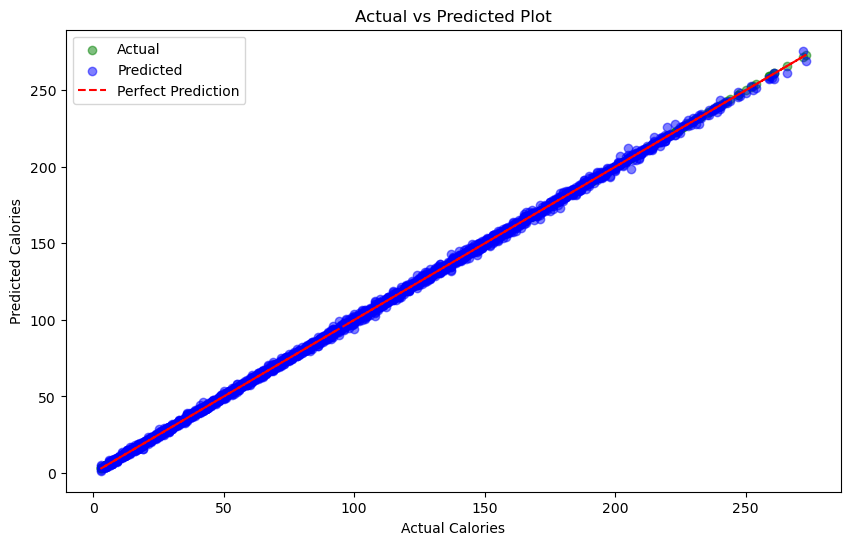

In [28]:
# Y_test is our df
df = Y_test

# Plotting Actual vs Predicted with different colors
plt.figure(figsize=(10, 6))

# Plotting actual values in green
plt.scatter(df['Calories'], df['Calories'], color='green', label='Actual', alpha=0.5)

# Plotting predicted values in blue
plt.scatter(df['Calories'], df['Pred'], color='blue', label='Predicted', alpha=0.5)

# Plotting the line for perfect prediction
plt.plot(df['Calories'], df['Calories'], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Plot')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.legend()
plt.show()


                                 - - - - - - - - X X X X X X X X - - - - - - - -